In [98]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
import numpy as np
import os
import scipy.io

#!pip install scikit-image
from skimage import color
from skimage import io

plt.rcParams['figure.figsize'] = [8, 8]
plt.rcParams.update({'font.size': 18})


(825, 800, 3)

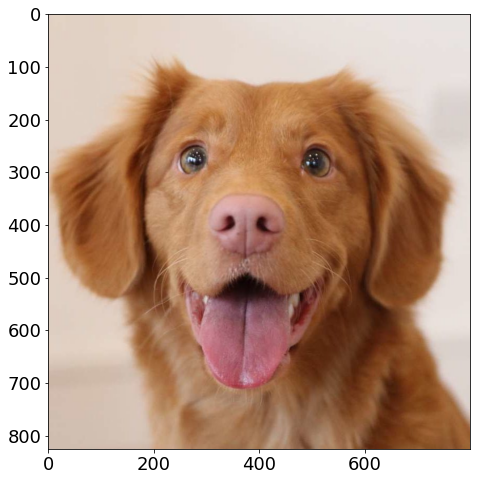

In [99]:
img0 = io.imread('image2.jpg')
img1 = img0
#img1 = color.rgb2gray(img0).astype(float)

plt.imshow(img1)
np.shape(img1)

In [100]:
def enhance(X, reps):

    Y = np.repeat(X, repeats= reps, axis=0)
    Z = np.repeat(Y, repeats= reps, axis=1)
    return(Z)

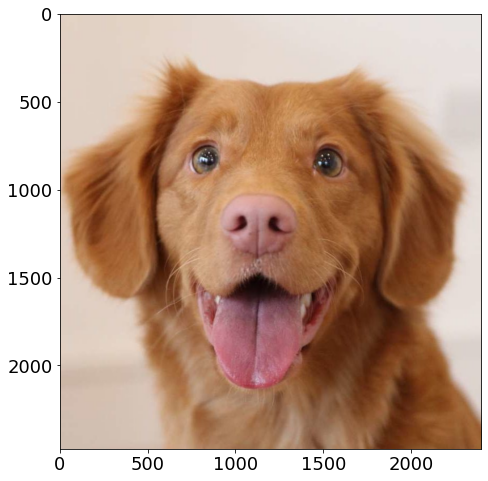

In [101]:
P = enhance(img1,3)
plt.imshow(P)

In [102]:
# Define randomized SVD function
def rSVD(X, r, q, p):
    # Step 1: Sample column space of X with P matrix
    ny = X.shape[1]
    P = np.random.randn(ny, r+p)
    Z = X @ P
    for k in range(q):
        Z = X @ (X.T @ Z)

    Q, R = np.linalg.qr(Z, mode='reduced')

    # Step 2: Compute SVD on projected Y = Q.T @ X
    Y = Q.T @ X
    UY, S, VT = np.linalg.svd(Y, full_matrices=0)
    U = Q @ UY

    return U, S, VT


In [103]:
A = img0
X = np.mean(A, axis=2)  # Convert RGB -> grayscale

U, S, VT = np.linalg.svd(X, full_matrices=0)  # Deterministic SVD

r = 250  # Target rank
q = 1   # Power iterations
p = 5   # Oversampling parameter

rU, rS, rVT = rSVD(X, r, q, p)


In [104]:
## Reconstruction
XSVD = U[:, :(r+1)] @ np.diag(S[:(r+1)]) @ VT[:(r+1), :]  # SVD approximation
errSVD = np.linalg.norm(X-XSVD, ord=2) / np.linalg.norm(X, ord=2)

XrSVD = rU[:, :(r+1)] @ np.diag(rS[:(r+1)]
                                ) @ rVT[:(r+1), :]  # SVD approximation
errSVD = np.linalg.norm(X-XrSVD, ord=2) / np.linalg.norm(X, ord=2)


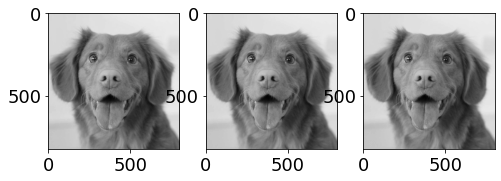

In [105]:
## Plot
fig, axs = plt.subplots(1, 3)

#plt.set_cmap('gray')
axs[0].imshow(X)
axs[1].imshow(XSVD)
axs[2].imshow(XrSVD)

plt.show()


In [106]:
"""## Illustrate power iterations
X = np.random.randn(1000,100)
U, S, VT = np.linalg.svd(X,full_matrices=0)
S = np.arange(1,0,-0.01)
X = U @ np.diag(S) @ VT

color_list = np.array([[0,0,2/3],  # Define color map
                 [0,0,1],
                 [0,1/3,1],
                 [0,2/3,1],
                 [0,1,1],
                 [1/3,1,2/3],
                 [2/3,1,1/3],
                 [1,1,0],
                 [1,2/3,0],
                 [1,1/3,0],
                 [1,0,0],
                 [2/3,0,0]])

plt.plot(S,'o-',color='k',LineWidth=2,label='SVD')

Y = X
for q in range(1,6):
    Y = X.T @ Y
    Y = X @ Y
    Uq, Sq, VTq = np.linalg.svd(Y,full_matrices=0)
    plt.plot(Sq,'-o',color=tuple(color_list[2*q+1]),LineWidth=2,label='rSVD, q = '+str(q))

plt.legend()
plt.show()"""

"## Illustrate power iterations\nX = np.random.randn(1000,100)\nU, S, VT = np.linalg.svd(X,full_matrices=0)\nS = np.arange(1,0,-0.01)\nX = U @ np.diag(S) @ VT\n\ncolor_list = np.array([[0,0,2/3],  # Define color map\n                 [0,0,1],\n                 [0,1/3,1],\n                 [0,2/3,1],\n                 [0,1,1],\n                 [1/3,1,2/3],\n                 [2/3,1,1/3],\n                 [1,1,0],\n                 [1,2/3,0],\n                 [1,1/3,0],\n                 [1,0,0],\n                 [2/3,0,0]])\n\nplt.plot(S,'o-',color='k',LineWidth=2,label='SVD')\n\nY = X\nfor q in range(1,6):\n    Y = X.T @ Y\n    Y = X @ Y\n    Uq, Sq, VTq = np.linalg.svd(Y,full_matrices=0)\n    plt.plot(Sq,'-o',color=tuple(color_list[2*q+1]),LineWidth=2,label='rSVD, q = '+str(q))\n\nplt.legend()\nplt.show()"